<a href="https://colab.research.google.com/github/minzadinov/HPC-2023/blob/main/matmul/matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from functools import partial

Генерация списка кортежей матриц nxn разной величины.

In [2]:
def matrix_gen(min_n, max_n, step):
  mat_tuple = lambda n: (torch.tensor(np.random.randn(n, n)),torch.tensor(np.random.randn(n, n)))
  return list(map(mat_tuple, list(range(min_n, max_n, step))))

Перемножение матриц в кортеже.

In [3]:
def matmul_with_time (mat_tuple, device):
  dev = torch.device('cpu') if torch.cuda.is_available()==False else device
  a=mat_tuple[0].to(dev)
  b=mat_tuple[1].to(dev)
  start_time = time.time()
  result=torch.matmul(a,b)
  end_time = time.time()
  execution_time = end_time - start_time
  return (result, execution_time)

Функция получения времени выполнения по размеру матрицы

In [4]:
def get_time_from_size (n, mats):
  for i in range(len(mats)):
    if math.sqrt(mats[i][0].nelement()) == n:
      return mats[i][1]

Проверка на идентичность матриц, перемноженных разными способами

In [5]:
def error_check (cpu, gpu, err):
  sub = lambda i: torch.subtract(cpu[i][0], gpu[i][0].to(torch.device('cpu')))
  isErr= False
  for i in range(len(cpu)):
    if sub(i).nansum() > err:
      print('Error with number ', i, ' matrix in list' )
      isErr=True
  if isErr==False:
    print('No errors')
  return None

Генерация, перемножение и проверка

In [10]:
NMAX=2000
NMIN=100
STEP=100

In [14]:
mats=matrix_gen(NMIN,NMAX,STEP)
cpu_mats=list(map(partial(matmul_with_time, device = torch.device('cpu')),mats))
gpu_mats=list(map(partial(matmul_with_time, device = torch.device('cuda')),mats))

In [16]:
error_check(cpu_mats, gpu_mats, 0.001)

No errors


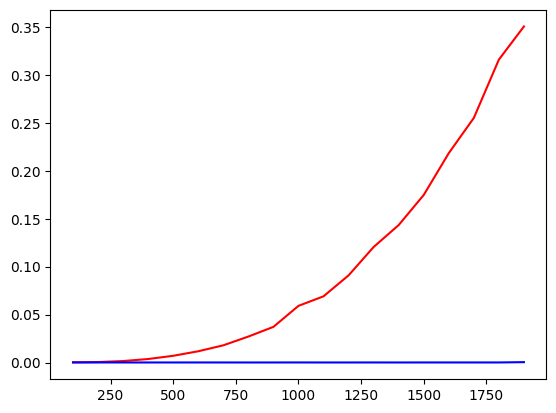

In [15]:
size = list(range(NMIN, NMAX, STEP))
cpu_time = list(map(partial(get_time_from_size, mats=cpu_mats), size))
gpu_time = list(map(partial(get_time_from_size, mats=gpu_mats), size))
plt.plot(size, cpu_time, 'r')
plt.plot(size, gpu_time, 'b')
plt.show()